<div style="text-align: center; background: linear-gradient(to right, #0077b6, #00b4d8); padding: 30px; border-radius: 15px; box-shadow: 0 4px 12px rgba(0,0,0,0.2);">
  <h1 style="color: white; font-weight: 800; font-size: 32px; margin-bottom: 10px;">
    Evaluating <span style="color: #caf0f8;">Deepdoctection</span> for Table Extraction
  </h1>
  <p style="color: #e0fbfc; font-size: 18px; margin: 0;">
    A Practical Assessment on Diverse Document Layouts and Table Structures
  </p>
</div>

# 📝 Introduction

In this notebook, we explore the performance of the **[Deepdoctection](https://huggingface.co/deepdoctection)** library,an advanced document layout analysis framework specifically focusing on **table detection and structure recognition** tasks. While Deepdoctection supports multiple layout elements such as headings, paragraphs, and figures, our goal is to evaluate its effectiveness in identifying and structuring **tables** across a variety of document formats and complexities.

For table recognition, Deepdoctection leverages the model **[`tatr_tab_struct_v2`](https://huggingface.co/deepdoctection/tatr_tab_struct_v2)**, which is based on **Microsoft’s Table Transformer** architecture. This model has been trained on large-scale datasets including:

* **[PubTables-1M](https://paperswithcode.com/dataset/pubtables-1m)** : a diverse corpus of scientific tables sourced from PubMed Central, with detailed structure annotations.
* **[FinTabNet](https://paperswithcode.com/dataset/fintabnet)** : a financial document dataset with complex table structures, sourced from real-world annual reports and SEC filings.

We conduct this assessment using a diverse set of documents containing. The goal is to understand the strengths and limitations of Deepdoctection’s table recognition pipeline, and to identify where it may need further enhancement or domain-specific tuning.

# **1. Install Libraries**

In [1]:
! pip install gradio_client   # requires Python >= 3.10 

# **2. Import Libraries**

In [2]:
from gradio_client import Client, handle_file
from IPython.display import display, Markdown, Image, HTML
import pandas as pd
from io import StringIO
import base64

# **3. Inference**

In [3]:
def extract_table_from_result(result):
    for item in result:
        if isinstance(item, str) and "<table>" in item:
            html_table = item
            return html_table
    return None

In [4]:
def display_results(image_path, result):
    with open(image_path, "rb") as f:
        img_data = f.read()
    img_base64 = base64.b64encode(img_data).decode()
    
    
    # Build HTML layout
    html_content = f"""
    <style>
        .flex-container {{
            display: flex;
            gap: 20px;
            align-items: flex-start;
        }}
        .image-box {{
            flex: 1.1;
        }}
        .image-box img {{
            width: 100%;
            max-width: 550px;
            border-radius: 6px;
        }}
        .table-box {{
            flex: 1.2;
            padding: 0px;  /* No padding or background */
            border-radius: 0px;
            overflow-x: auto;
        }}
        h3 {{
            margin-bottom: 10px;
        }}
    </style>

    <div class="flex-container">
        <div class="image-box">
            <h3>📄 Input Document Page</h3>
            <img src="data:image/png;base64,{img_base64}"/>
        </div>
        <div class="table-box">
            <h3>📊 Extracted Table</h3>
            {result}
        </div>
    </div>
    """
    
    display(HTML(html_content))

In [5]:
def analyze_image(image_path, max_datapoints=2):
    """
    analyze an image using deepdoctection API.

    Parameters:
        image_path (str): Path to the image file to be analyzed.
        max_datapoints (int, optional): Maximum number of data points to retrieve. Defaults to 2.

    Returns:
        result (dict): The result from the image analysis.
    """
    client = Client("deepdoctection/deepdoctection")
    result = client.predict(
        img=handle_file(image_path),  # accepts image files, e.g. JPEG, PNG
        pdf=None,
        max_datapoints=max_datapoints,
        api_name="/analyze_image"
    )
    table_res = extract_table_from_result(result)
    display_results(image_path, table_res)

## **Example n°1**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



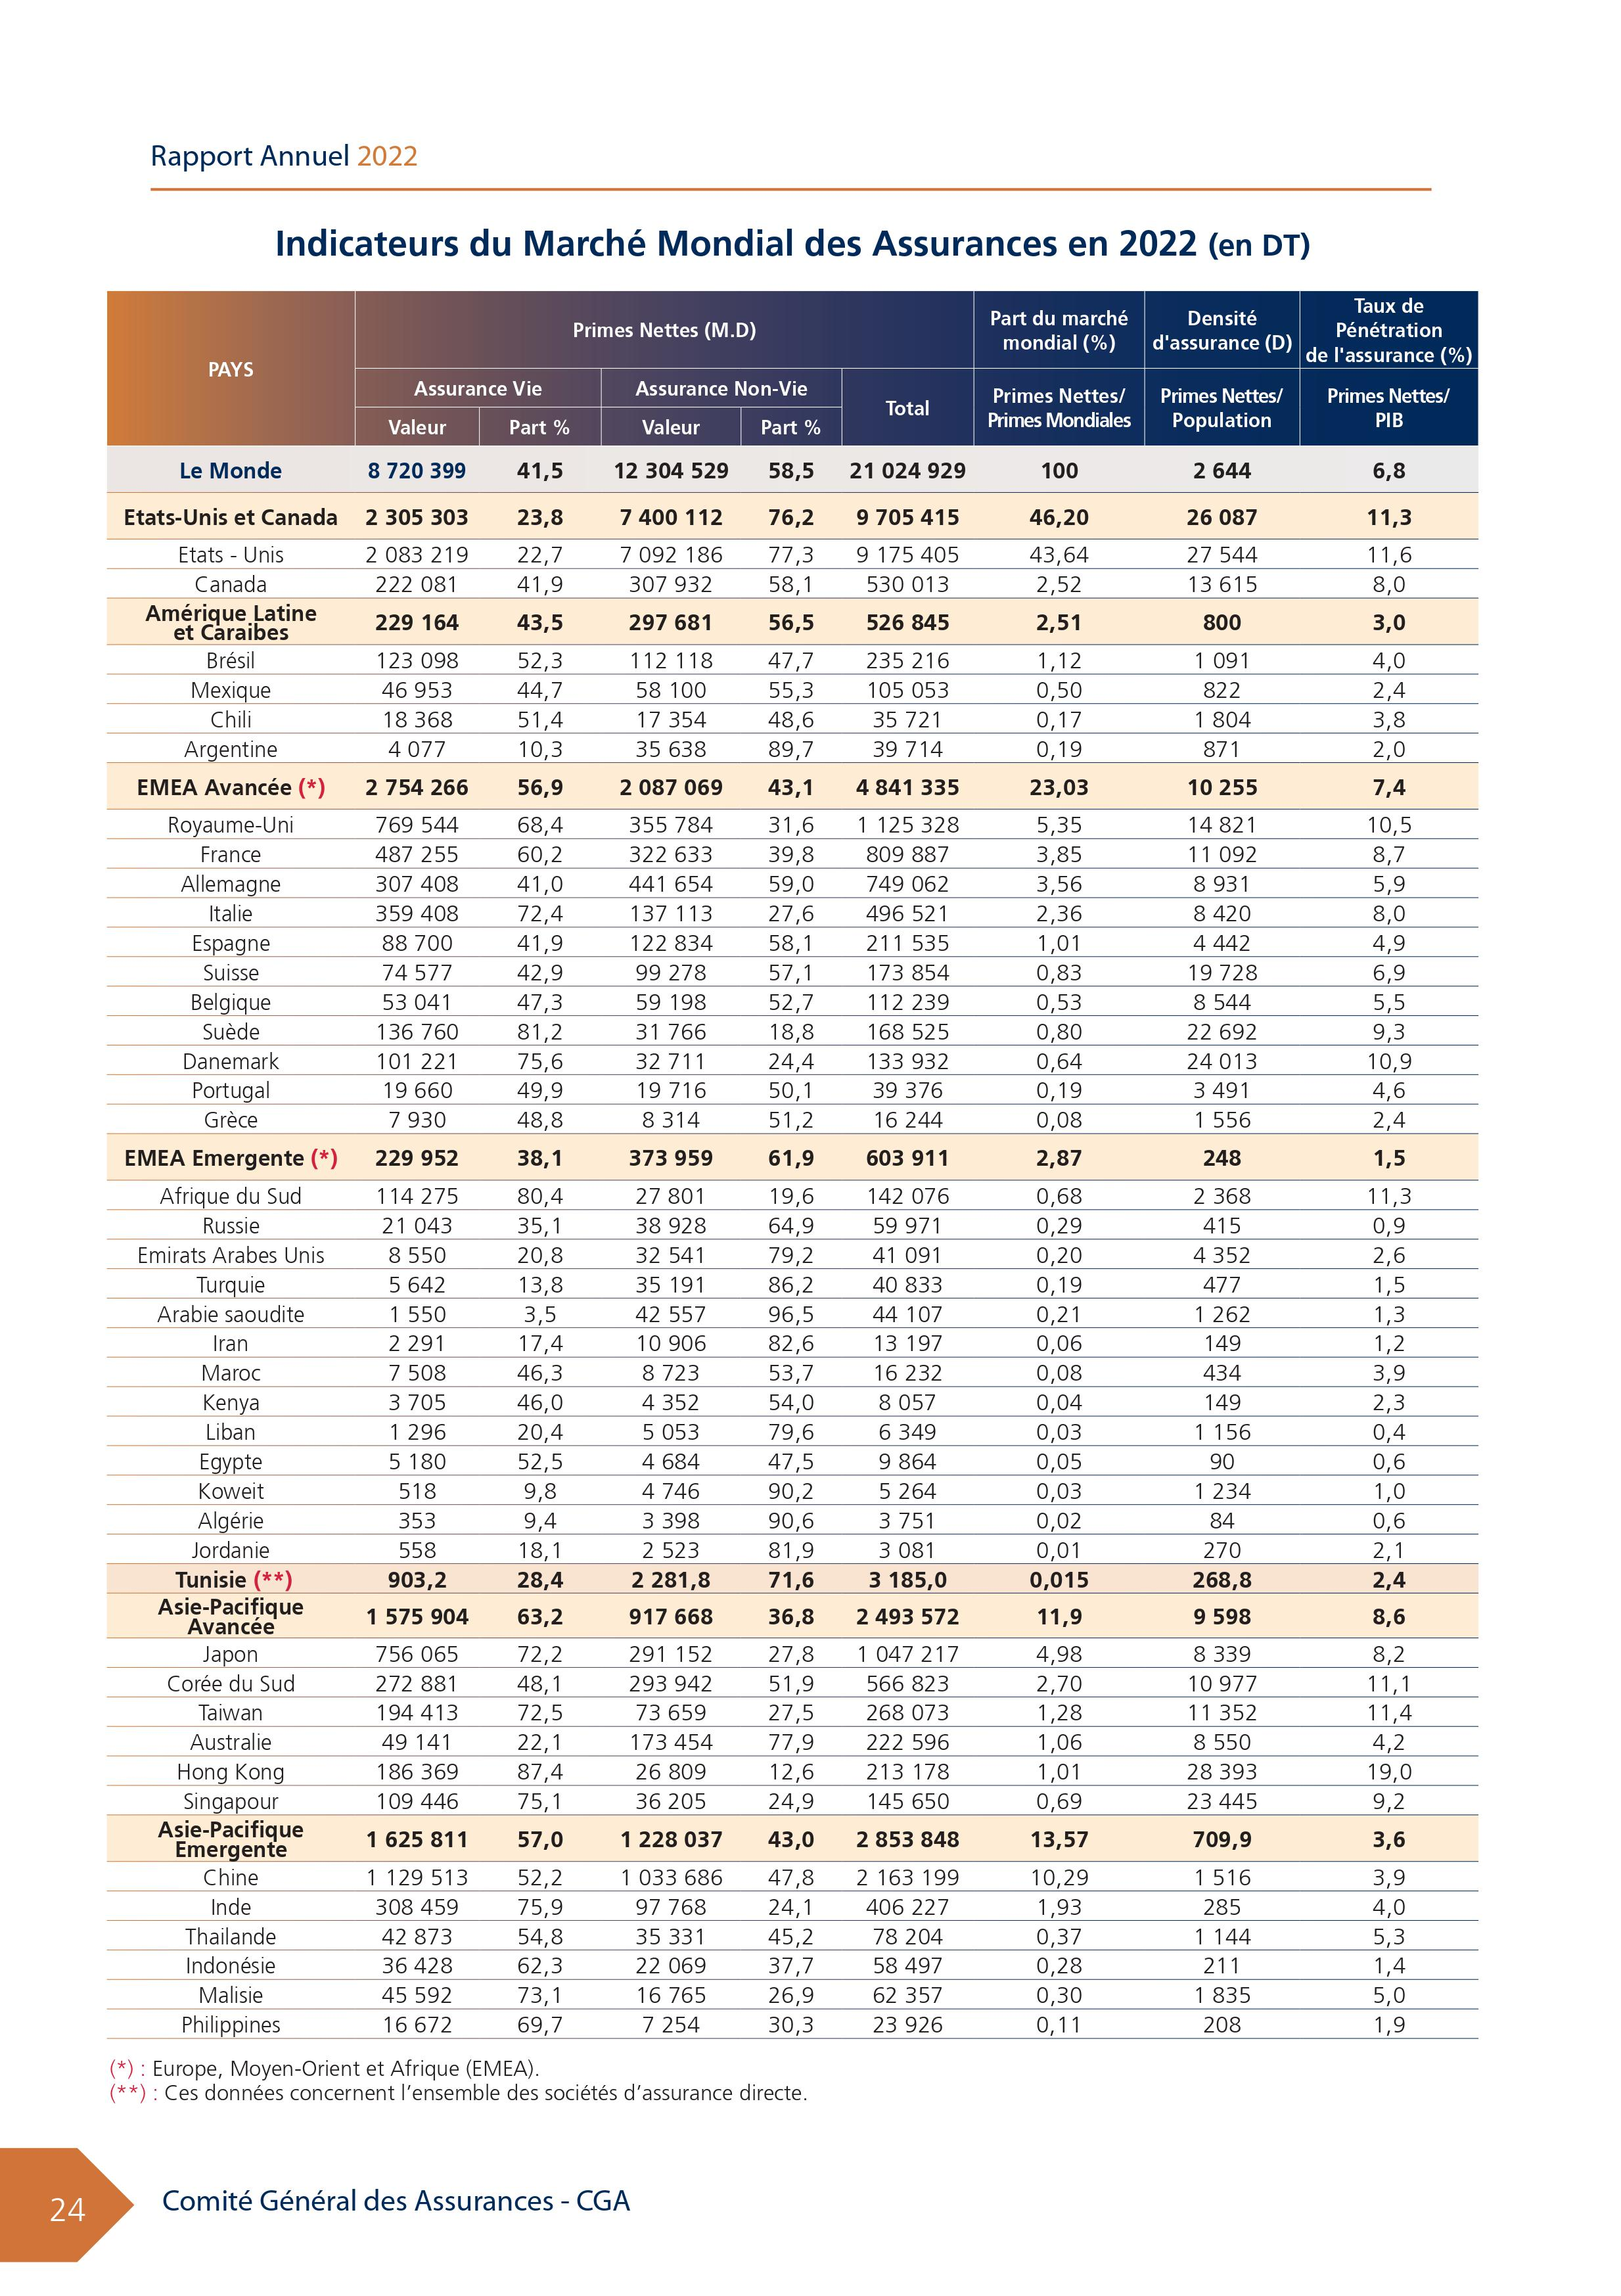

In [6]:
analyze_image('/kaggle/input/different-tables-images-testing/other_table.jpg')

## **Example n°2**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



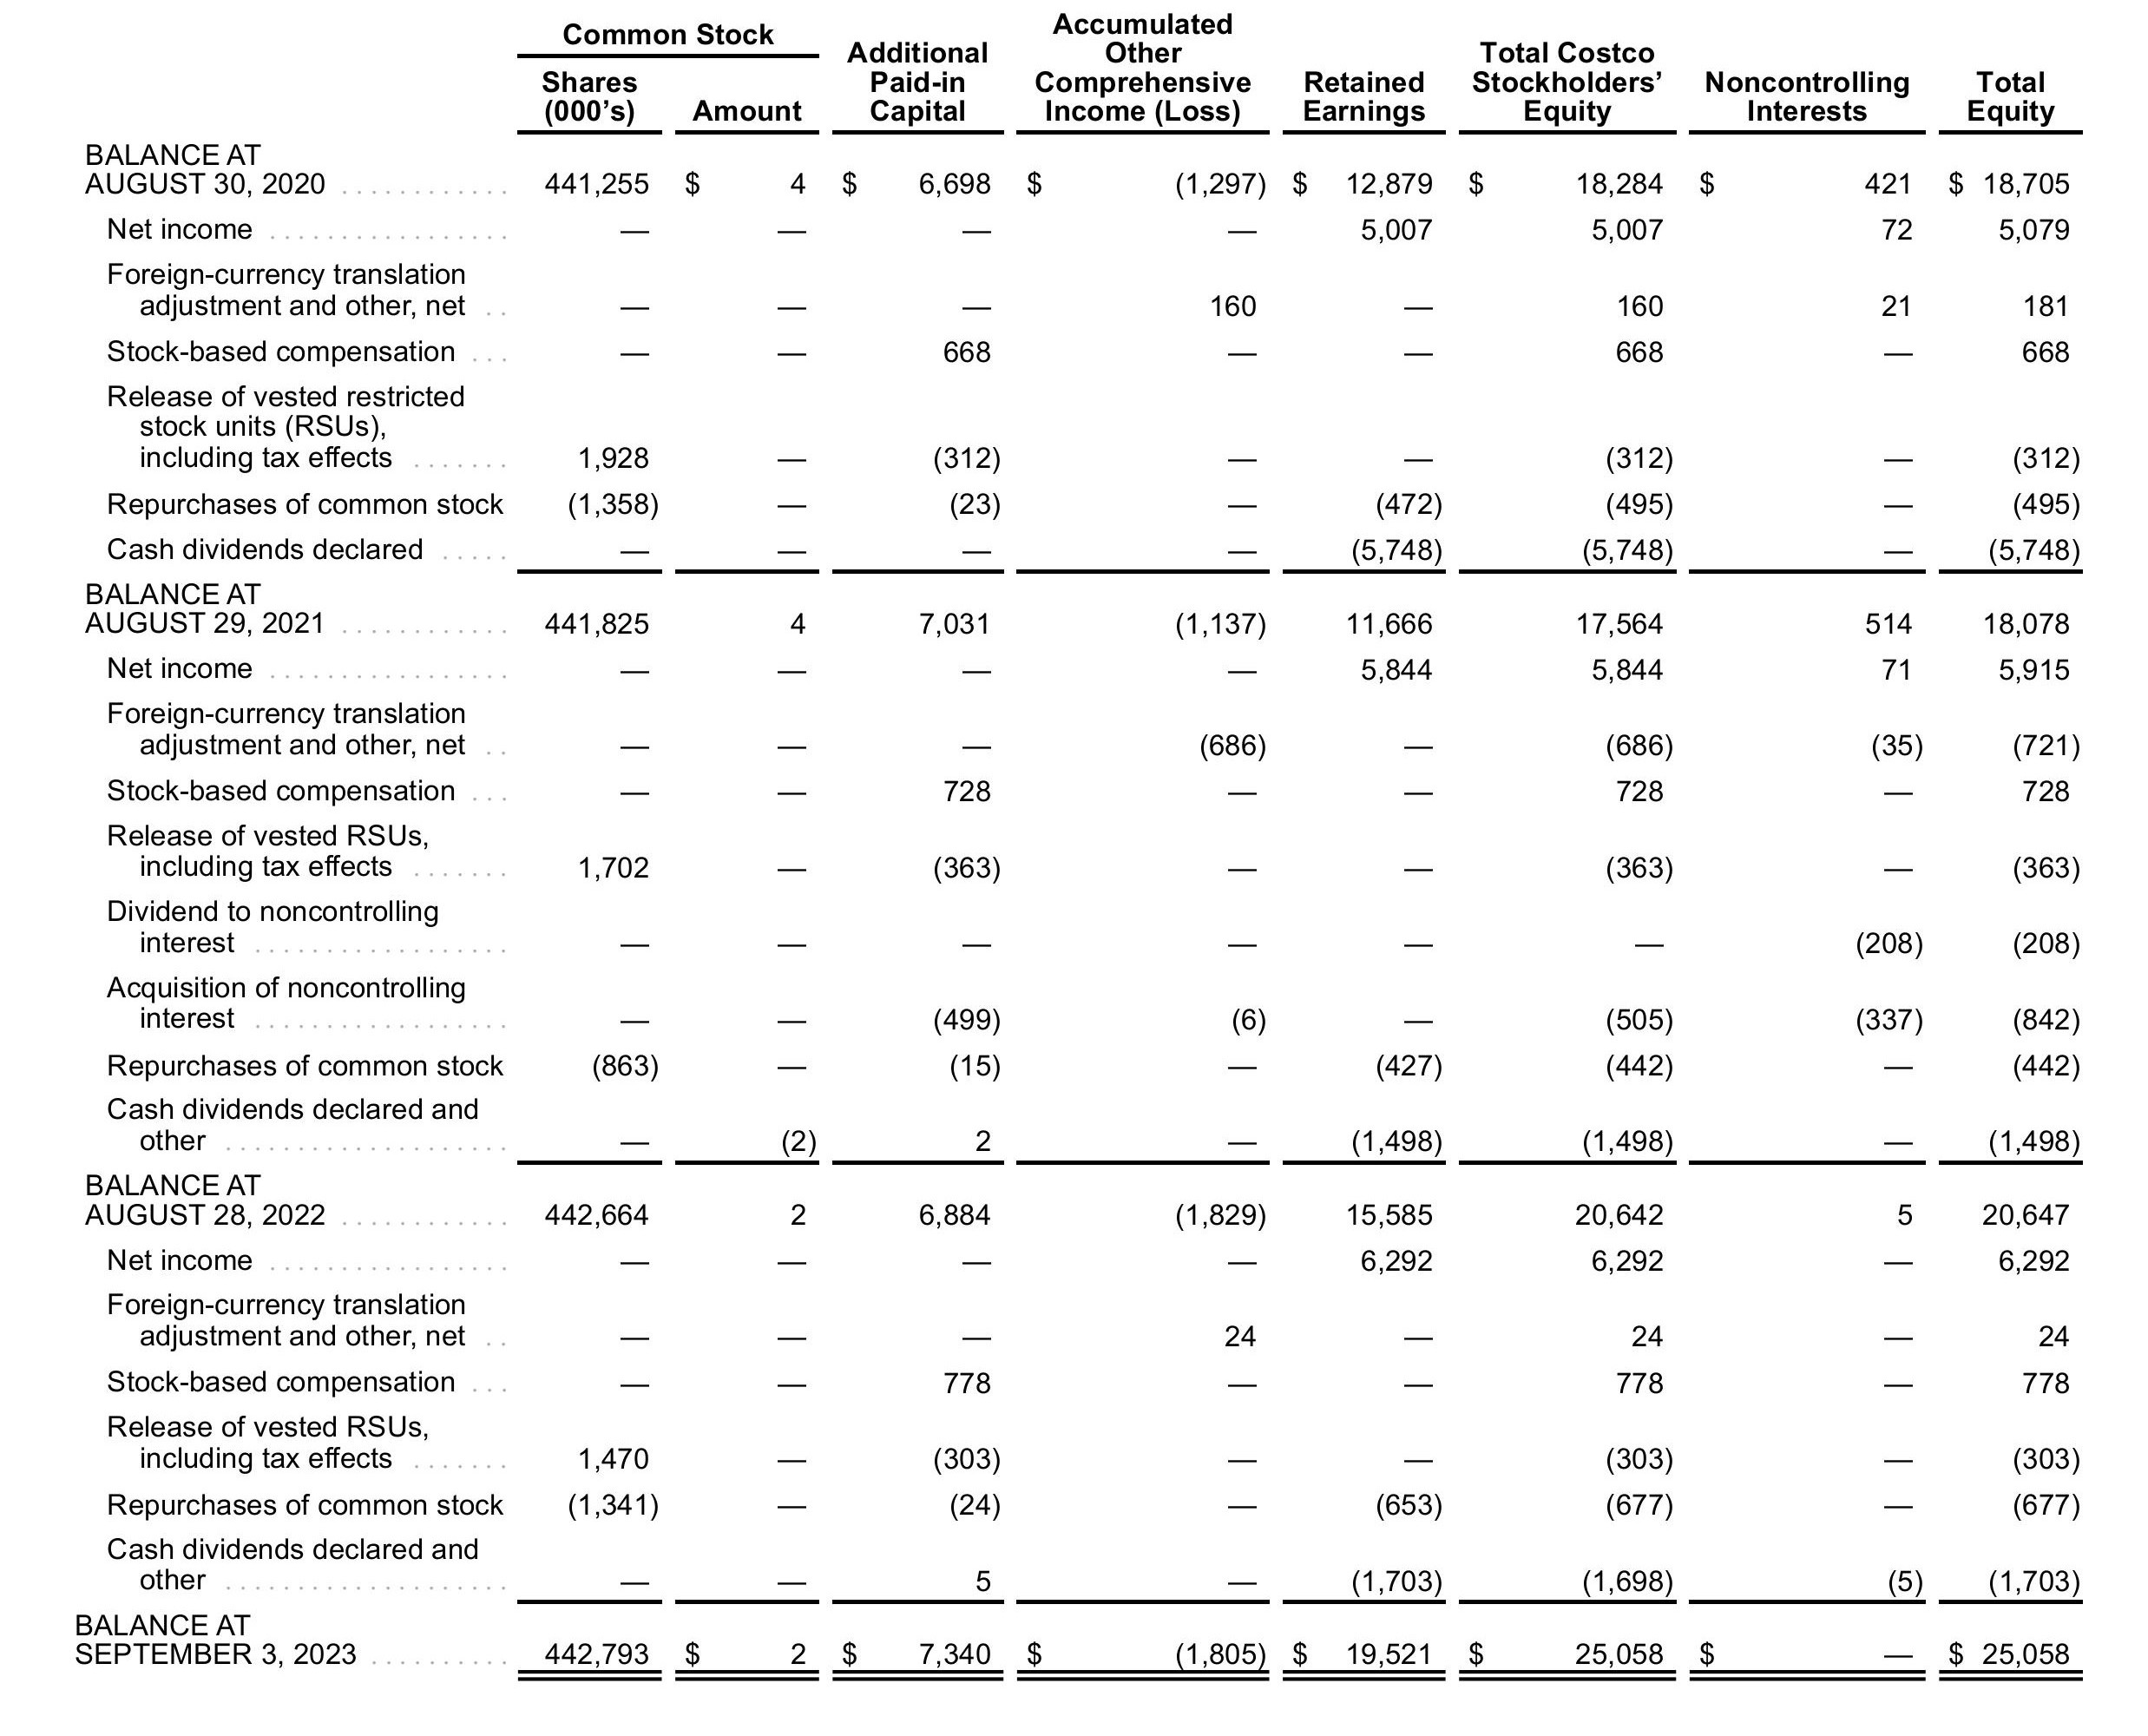

In [7]:
analyze_image('/kaggle/input/tables-different-cases-cropped/table_3_cropped.jpg')

## **Example n°3**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



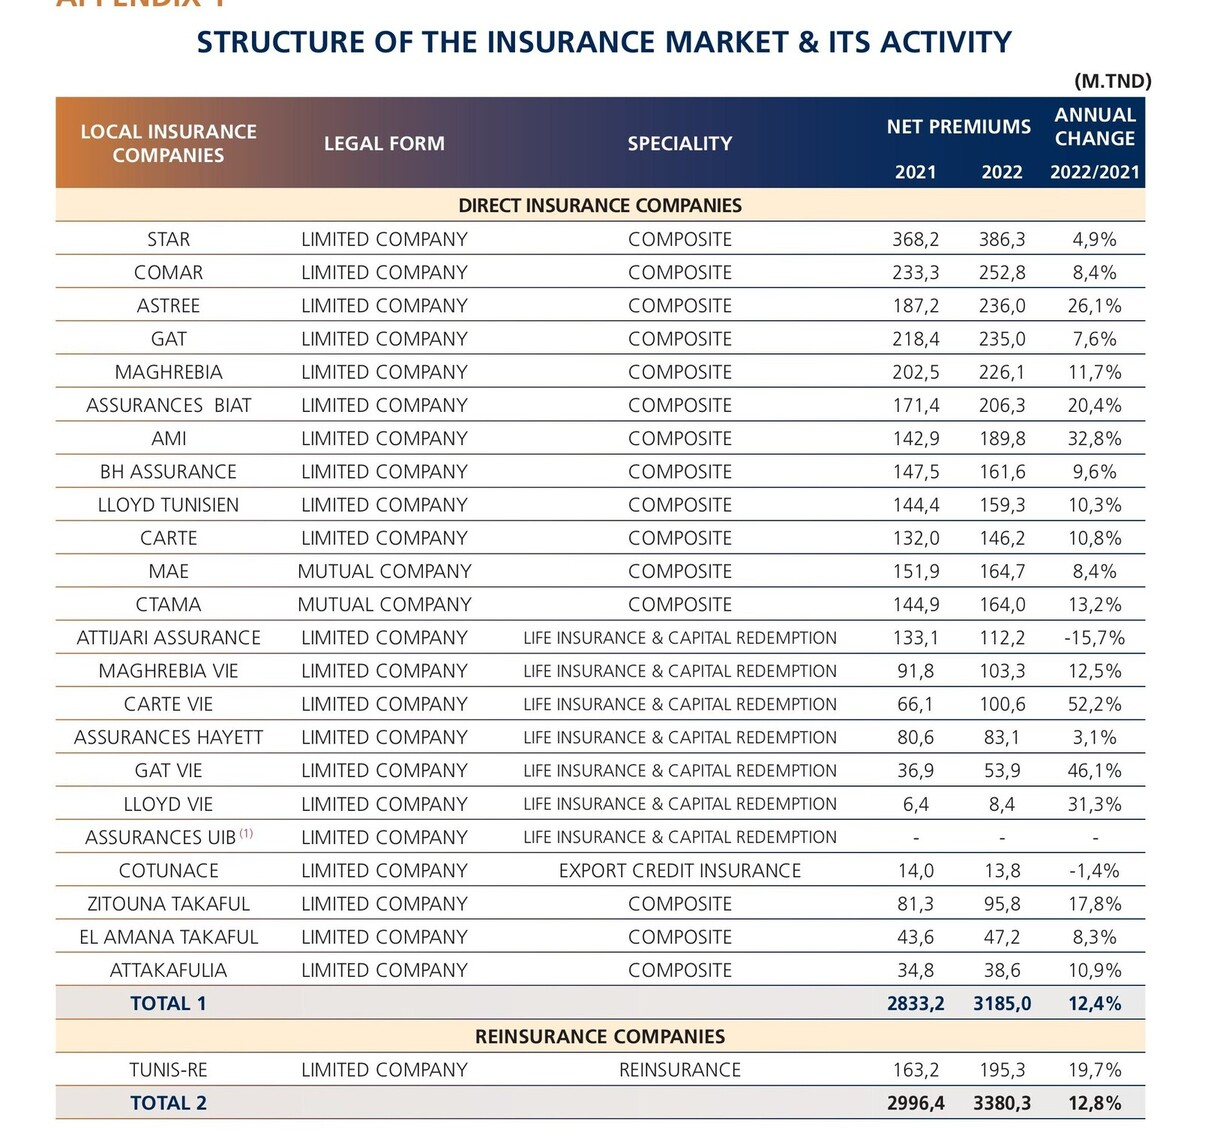

In [8]:
analyze_image('/kaggle/input/cga-images/RAP_CGA_FR_ANG_2022-images-79 (1) (1).jpg')

## **Example n°4**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



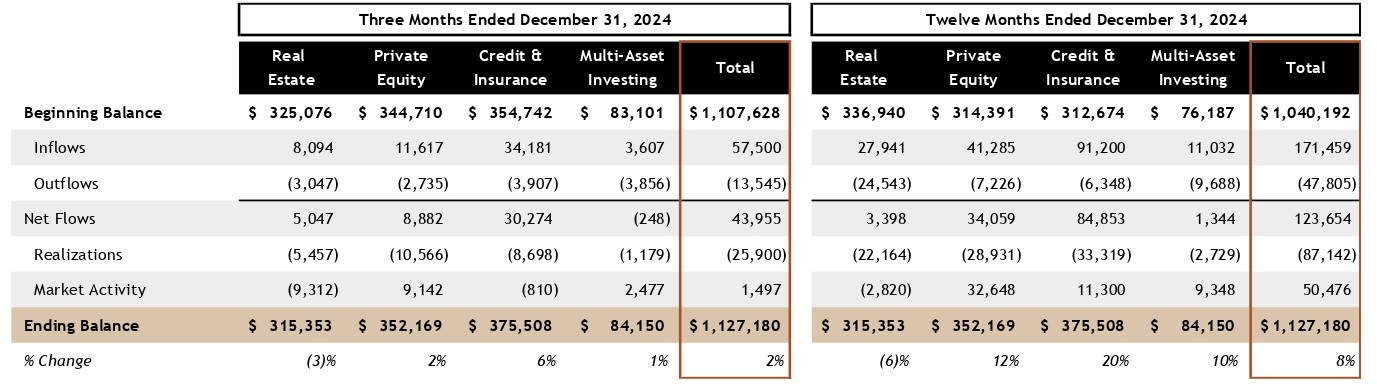

In [9]:
analyze_image("/kaggle/input/tables-different-cases-cropped/Blackstone4Q24EarningsPressRelease_page-0020_cropped.jpg")

## **Example n°5**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



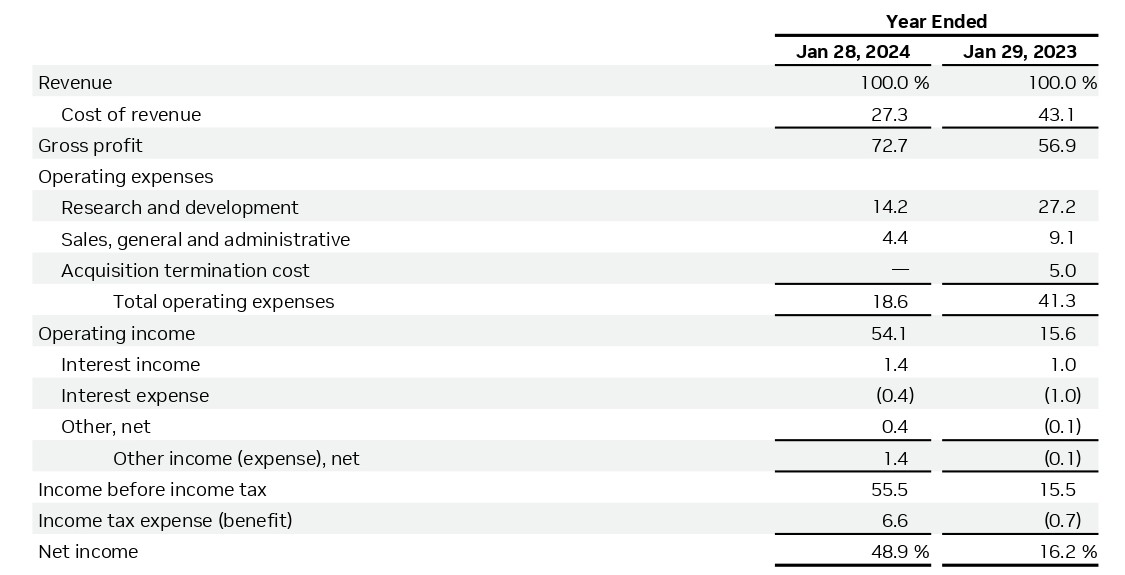

In [10]:
analyze_image("/kaggle/input/tables-different-cases-cropped/NVIDIA_Report_Removed_Pages-1-16-9_page-0001_cropped.jpg")

## **Example n°6**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



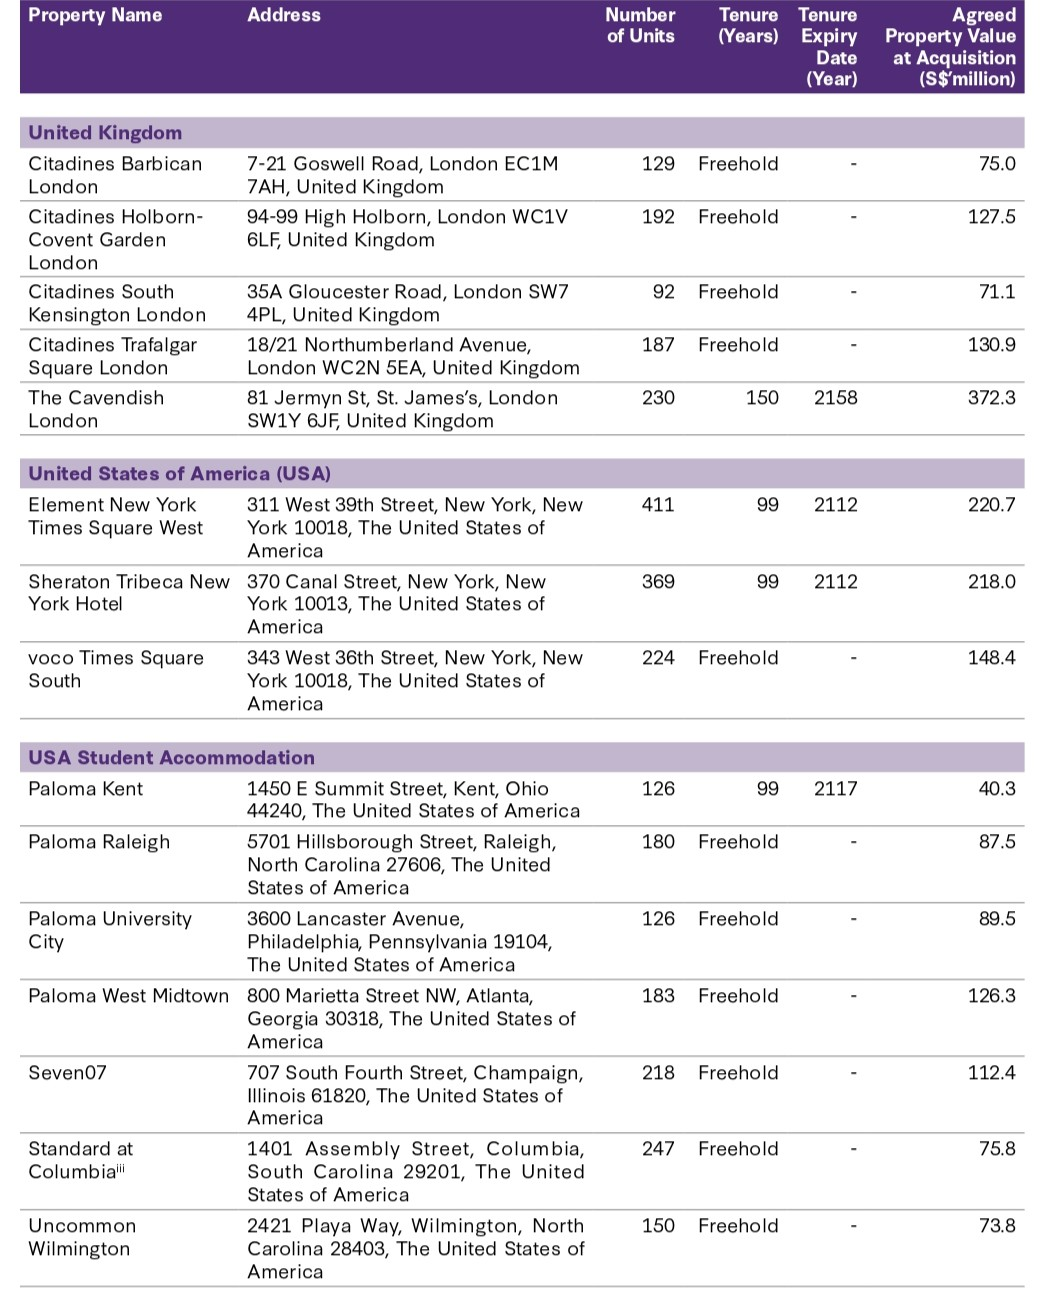

In [11]:
analyze_image("/kaggle/input/tables-different-cases-cropped/CLAS-FY2023-AR_page-0076_cropped.jpg")

## **Example n°7**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



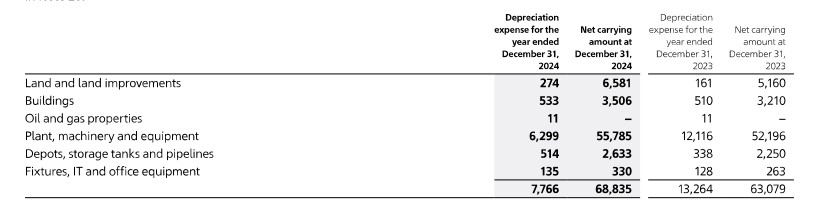

In [12]:
analyze_image("/kaggle/input/tables-different-cases-cropped/aramco_table_2.jpg")

## **Example n°8**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



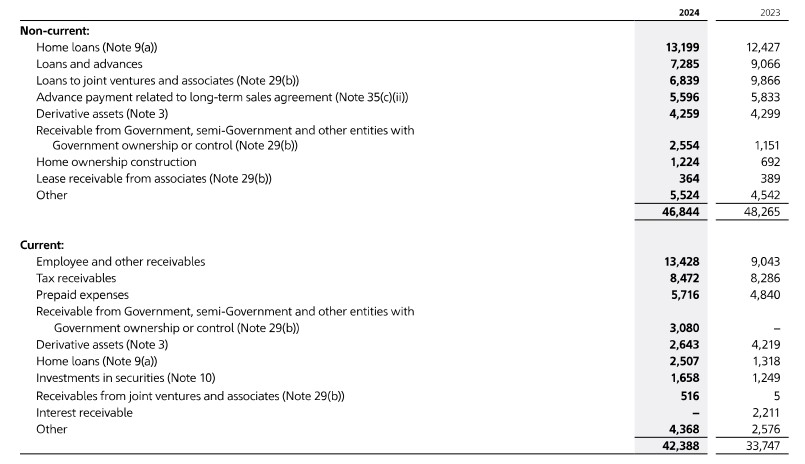

In [13]:
analyze_image("/kaggle/input/tables-different-cases-cropped/aramco_table_5.jpg")

## **Example n°9**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



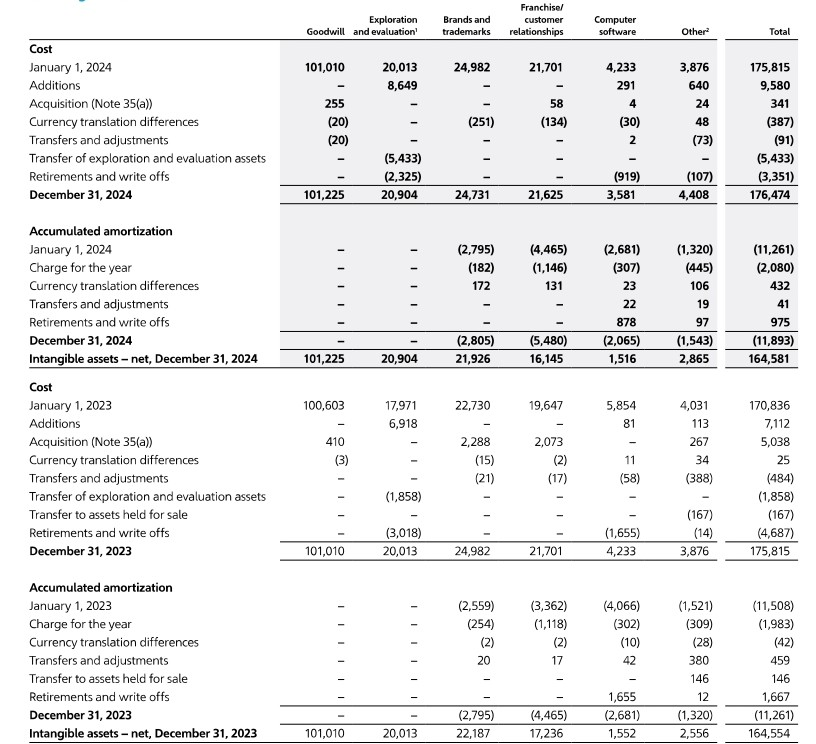

In [14]:
analyze_image("/kaggle/input/tables-different-cases-cropped/aramco_table_3.jpg")

## **Example n°10**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



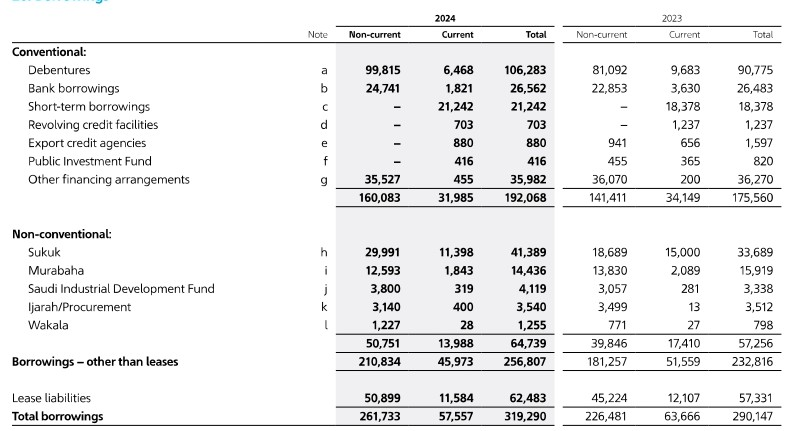

In [15]:
analyze_image("/kaggle/input/tables-different-cases-cropped/aramco_table_6.jpg")

## **Example n°11**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



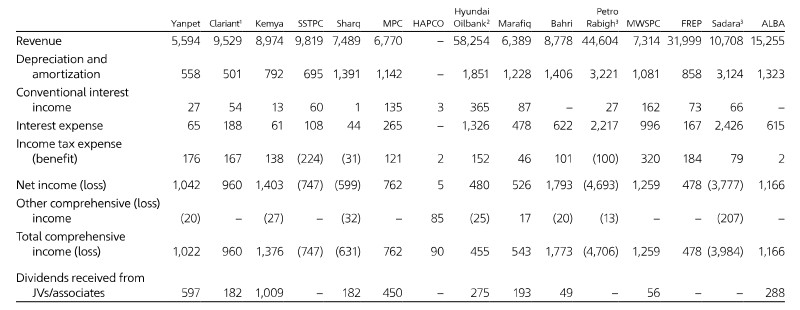

In [16]:
analyze_image("/kaggle/input/tables-different-cases-cropped/aramco_table_4.jpg")

## **Example n°12**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



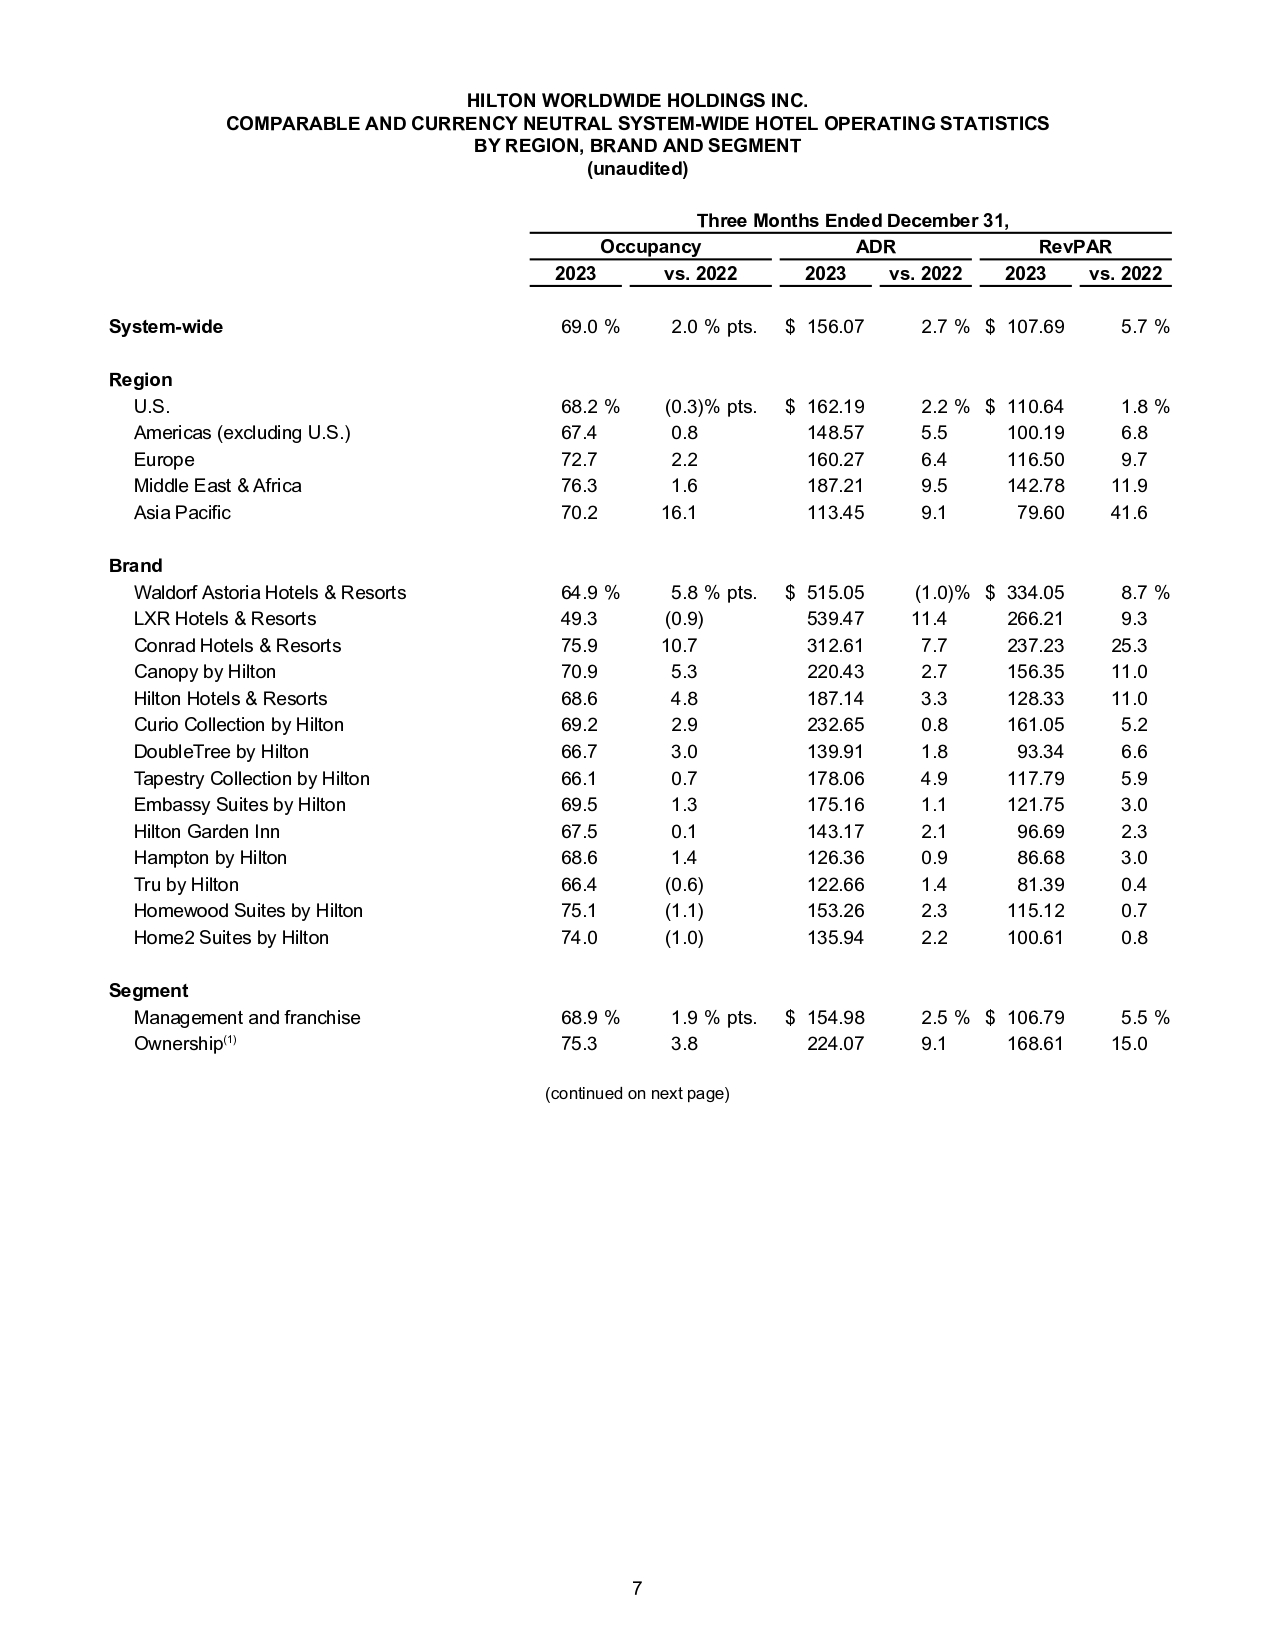

In [17]:
analyze_image("/kaggle/input/pdf-files-pages/q4-2023-earnings-release_page-0007.jpg")

## **Example n°13**

Loaded as API: https://deepdoctection-deepdoctection.hf.space ✔



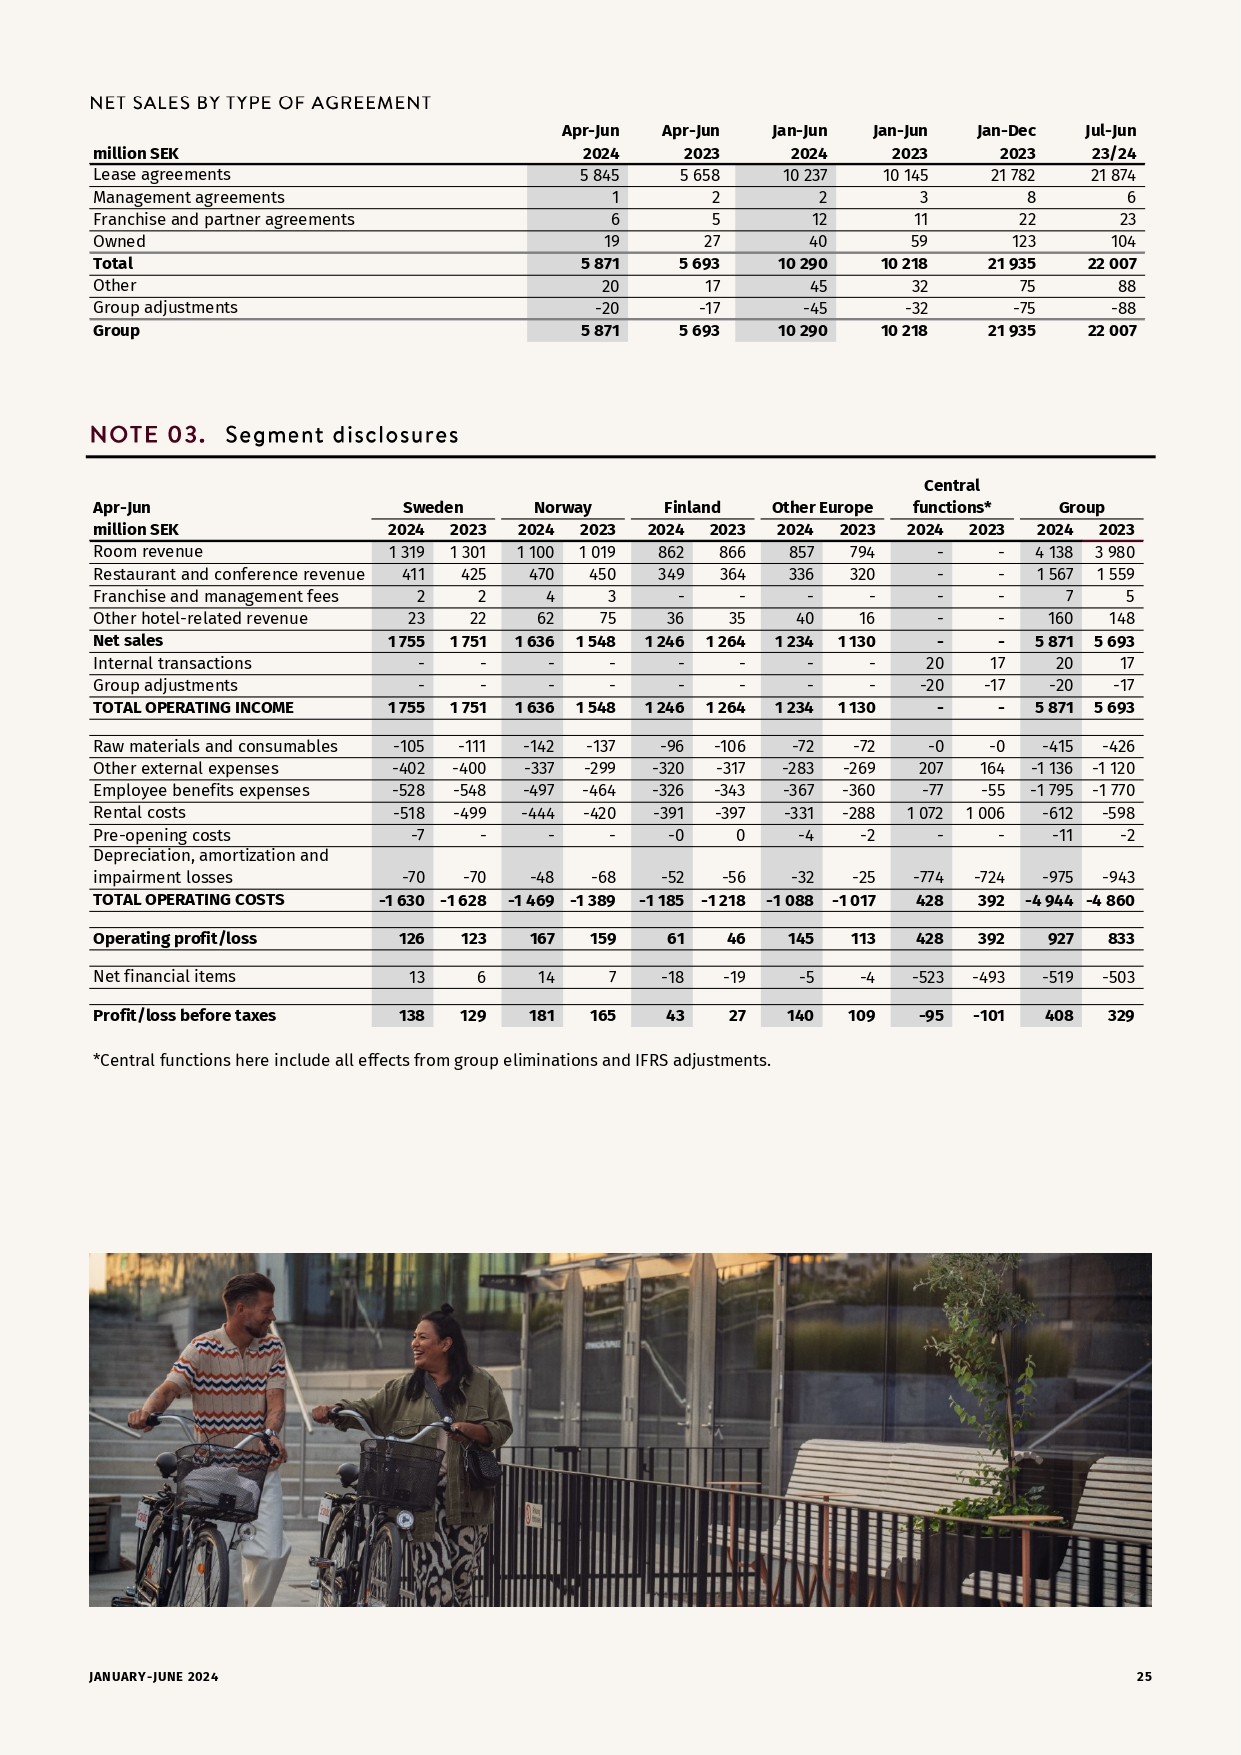

In [18]:
analyze_image("/kaggle/input/pdf-files-pages/the-full-report-pdf_page-0026.jpg")

# ✅ Conclusion

**Deepdoctection** delivers strong performance in table recognition, accurately extracting structure in most cases. Powered by the `tatr_tab_struct_v2` model, it handles a wide variety of table layouts effectively.

While a few cases showed **column merging** where separation was visually subtle, the overall results were **highly accurate and reliable**, making it well suited for practical table extraction tasks.